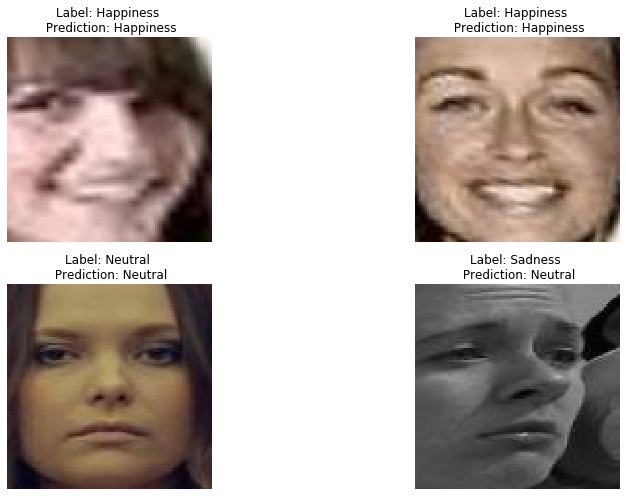

In [12]:
import random 
import keras
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import pickle
from skimage.feature import hog

def Emotion_Recognition(path_to_testset='CW_Dataset/test/',model_path= 'cnn_model.h5'):
    
    if model_path.endswith('.h5'):
        model = keras.models.load_model(model_path)
        labels_path = 'CW_Dataset/labels/list_label_test.txt'

        labels = pd.read_csv(labels_path,sep=' ',header=None)
        labels = labels.set_index(0)
        labels.columns = ['label']


        fig, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=True, sharey=True)
        ax = axes.ravel()
        for n in range(4):
            i = random.randint(1, len(labels) - 1)
            if i < 10:
                path = path_to_testset + 'test_000' + str(i + 1) + '.jpg'
            elif i < 100:
                path = path_to_testset + 'test_00' + str(i + 1) + '.jpg'
            elif i < 1000:
                path = path_to_testset + 'test_0' + str(i + 1) + '.jpg'
            elif i < 10000:
                path = path_to_testset + 'test_' + str(i + 1) + '.jpg'
            #p = path.split('/')[-1]
            p = path.split('.')[0]+'_aligned.jpg'
            path = path.split('/')[-1]
            label = labels.loc[path].values[0]
            img = io.imread(p)
            ax[n].imshow(img)
            emo_dict = {1: 'Surprise', 2: 'Fear', 3: 'Disgust', 4: 'Happiness', 5: 'Sadness', 6: 'Anger', 7: 'Neutral'}
            label = emo_dict[label]
            img = np.expand_dims(img,axis =0)

            out =emo_dict[1+np.argmax(model.predict(img))]

            ax[n].set_title(f'Label: {label} \n Prediction: {out}')
        ax[n].set_axis_off()
        fig.tight_layout()
        plt.show()

    else:
        
        model = pickle.load(open(model_path, 'rb'))
        labels_path = 'CW_Dataset/labels/list_label_test.txt'

        labels = pd.read_csv(labels_path,sep=' ',header=None)
        labels = labels.set_index(0)
        labels.columns = ['label']


        fig, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=True, sharey=True)
        ax = axes.ravel()
        for n in range(4):
            i = random.randint(1, len(labels) - 1)
            if i < 10:
                path = path_to_testset + 'test_000' + str(i + 1) + '.jpg'
            elif i < 100:
                path = path_to_testset + 'test_00' + str(i + 1) + '.jpg'
            elif i < 1000:
                path = path_to_testset + 'test_0' + str(i + 1) + '.jpg'
            elif i < 10000:
                path = path_to_testset + 'test_' + str(i + 1) + '.jpg'
            #p = path.split('/')[-1]
            p = path.split('.')[0]+'_aligned.jpg'
            path = path.split('/')[-1]
            label = labels.loc[path].values[0]
            img = io.imread(p)
            ax[n].imshow(img)
            emo_dict = {1: 'Surprise', 2: 'Fear', 3: 'Disgust', 4: 'Happiness', 5: 'Sadness', 6: 'Anger', 7: 'Neutral'}
            label = emo_dict[label]
            #img = np.expand_dims(img)
            img,_ = hog(img, orientations=8, pixels_per_cell=(16, 16),
                                     cells_per_block=(1, 1), visualize=True, multichannel=True)

            img = np.expand_dims(img,axis=0)
            out = model.predict(img)
            out = emo_dict[out[0]]

            ax[n].set_title(f'Label: {label} \n Prediction: {out}')
            ax[n].set_axis_off()
        fig.tight_layout()
        plt.show()
    
    
    
Emotion_Recognition('CW_Dataset/test/','svm_with_hog.sav')

In [ ]:
import cv2
import numpy as np
from time import sleep
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D


def get_model():
    emotion_model = Sequential()
    emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,100,3)))
    emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    emotion_model.add(Dropout(0.25))
    emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    emotion_model.add(Dropout(0.25))
    emotion_model.add(Flatten())
    emotion_model.add(Dense(1024, activation='relu'))
    emotion_model.add(Dropout(0.5))
    emotion_model.add(Dense(7, activation='softmax'))

    emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
    
    return emotion_model

def EmotionRecognitionVideo(model_path='cnn_model.h5',video_path= 'video.mp4'):
  video_path = video_path
  
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  class_labels = ["Surprise","Fear","Disgust","Happiness","Sadness","Anger","Neutral"]
  res = 'results.mp4'
  writer = None
  W,H = None,None
  model = get_model()
  model.load_weights('cnn_model.h5')

  def face_detector(img):
      # Convert image to grayscale
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
      if faces is ():
          return (0,0,0,0), np.zeros((100,100), np.uint8), img
      
      for (x,y,w,h) in faces:
          cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
          roi_gray = img_gray[y:y+h, x:x+w]

      try:
          roi_gray = cv2.resize(roi_gray, (100, 100), interpolation = cv2.INTER_AREA)
      except:
          return (x,w,y,h), np.zeros((100,100), np.uint8), img
      return (x,w,y,h), roi_gray, img

  cap = cv2.VideoCapture(video_path)

  while True:

      ret, frame = cap.read()
      if not ret:
          break
      if W is None or H is None:
          (H, W) = frame.shape[:2]
      rect, face, image = face_detector(frame)
      if np.sum([face]) != 0.0:
          roi = face.astype("float") / 255.0
          roi = img_to_array(roi)
          roi = np.expand_dims(roi, axis=0)

          # make a prediction on the ROI, then lookup the class
          preds = model.predict(roi)
          label = class_labels[np.argmax(preds)]  
          label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
          cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
      else:
          cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
          
      cv2.imshow('All', image)
      if writer is None:
        # initialize our video writer
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter(res, fourcc, 30,(W, H), True)
      writer.write(image)
    
      if cv2.waitKey(1) == 13: #13 is the Enter Key
          break
          
  cap.release()
  cv2.destroyAllWindows()
  writer.release()

EmotionRecognitionVideo('cnn_model.h5','test.mp4')

KeyboardInterrupt: 

In [ ]:
'''
Reference: 
1. Lab 06 Haarcascade face detector
2. https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html
3. https://www.programcreek.com/python/example/72134/cv2.VideoWriter

'''